In [75]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt 
import pandas as pd
import mglearn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [3]:
# Specify a different directory where you have write permissions
data_home = "D:/sszone_technology/Face Detection System"

In [4]:
# Load the Olivetti Faces dataset
data = fetch_olivetti_faces(data_home=data_home)

In [5]:
# Extract images and labels
images = data.images
labels = data.target

In [16]:
print("There are {} images in the dataset".format(len(data.images)))
print("There are {} unique targets in the dataset".format(len(np.unique(labels))))
print("Size of each image is {}x{}".format(images.shape[1], images.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:", images[0][0, :4])

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g: [0.30991736 0.3677686  0.41735536 0.44214877]


In [18]:
print("unique target number:",np.unique(labels))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [23]:
#Show 48 Disticnt People in the Olivetti Dataset

def show_48_distinct_people(images, unique_ids):
    # Creating 6x8 subplots in 24x12 figure size
    fig, axarr = plt.subplots(nrows=6, ncols=8, figsize=(24, 12))
    # For easy iteration flattened 6x8 subplots matrix to 48 array
    axarr = axarr.flatten()

    # Iterating over user ids
    for idx, unique_id in enumerate(unique_ids[:48]):
        image_index = unique_id * 10
        axarr[idx].imshow(images[image_index], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Face ID: {}".format(unique_id))
    
    plt.suptitle("There are 48 distinct people in the dataset")
    plt.show()


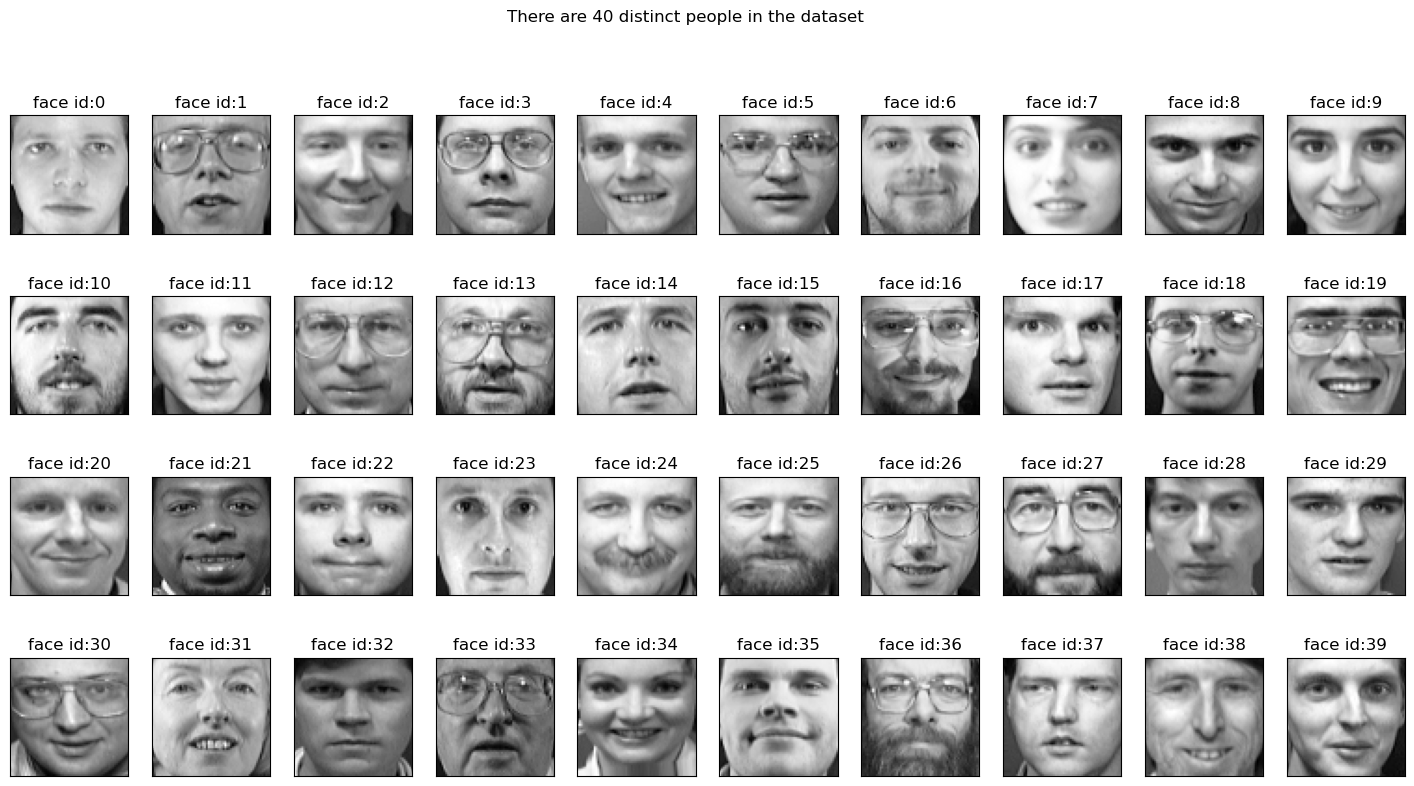

In [25]:
# Call the function
unique_ids = np.unique(labels)
show_40_distinct_people(data.images, unique_ids)

In [26]:
#Show 10 Face Images of Selected Target

def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

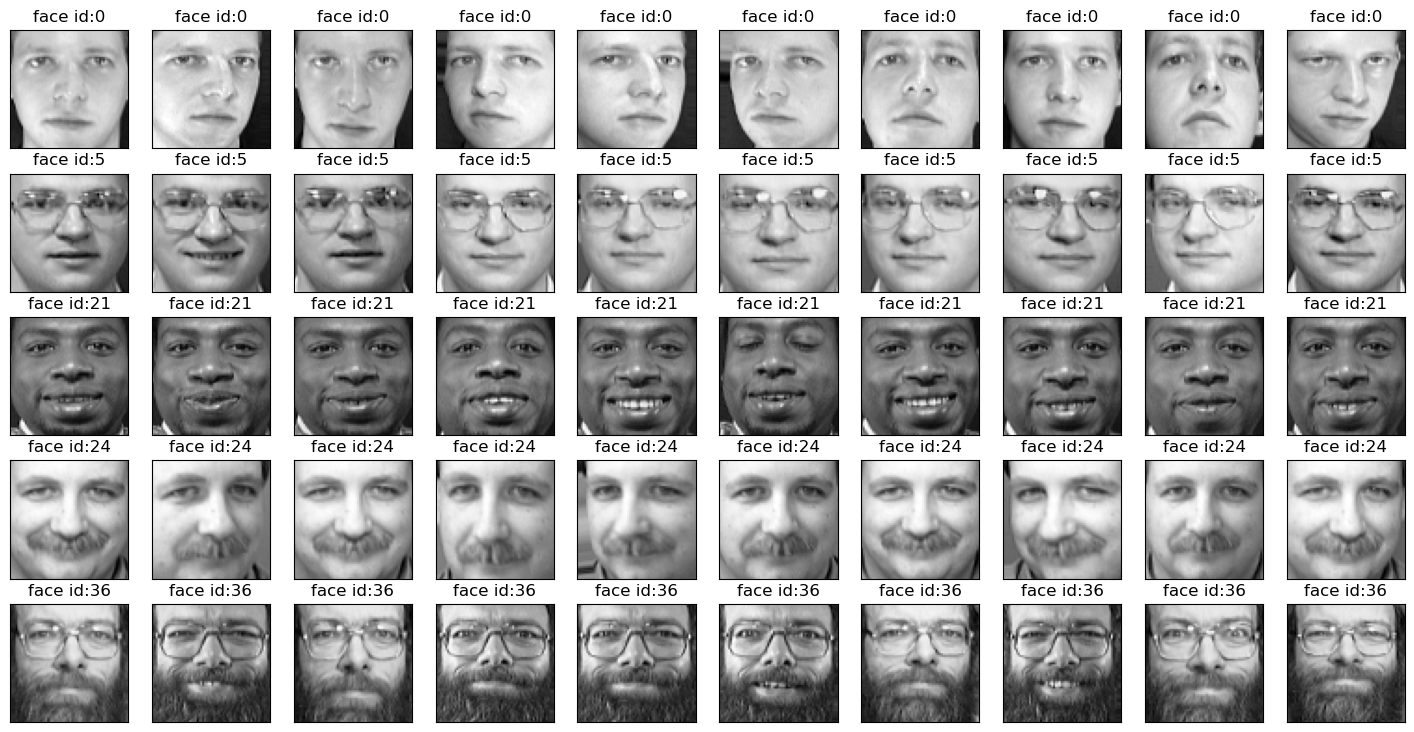

In [29]:
# Call the function with the desired subject IDs
show_10_faces_of_n_subject(images=data.images, subject_ids=[0, 5, 21, 24, 36])

In [31]:
#Machine Learning Model fo Face Recognition
# Reshape the images for machine learning model
X = data.images.reshape((data.images.shape[0], -1))
print("X shape:", X.shape)

X shape: (400, 4096)


In [32]:
#Split data and target into Random train and test Subsets
X_train, X_test, y_train, y_test=train_test_split(X, labels, test_size=0.3, stratify=labels, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


<Axes: title={'center': 'Number of Samples for Each Classes'}, xlabel='subject ids'>

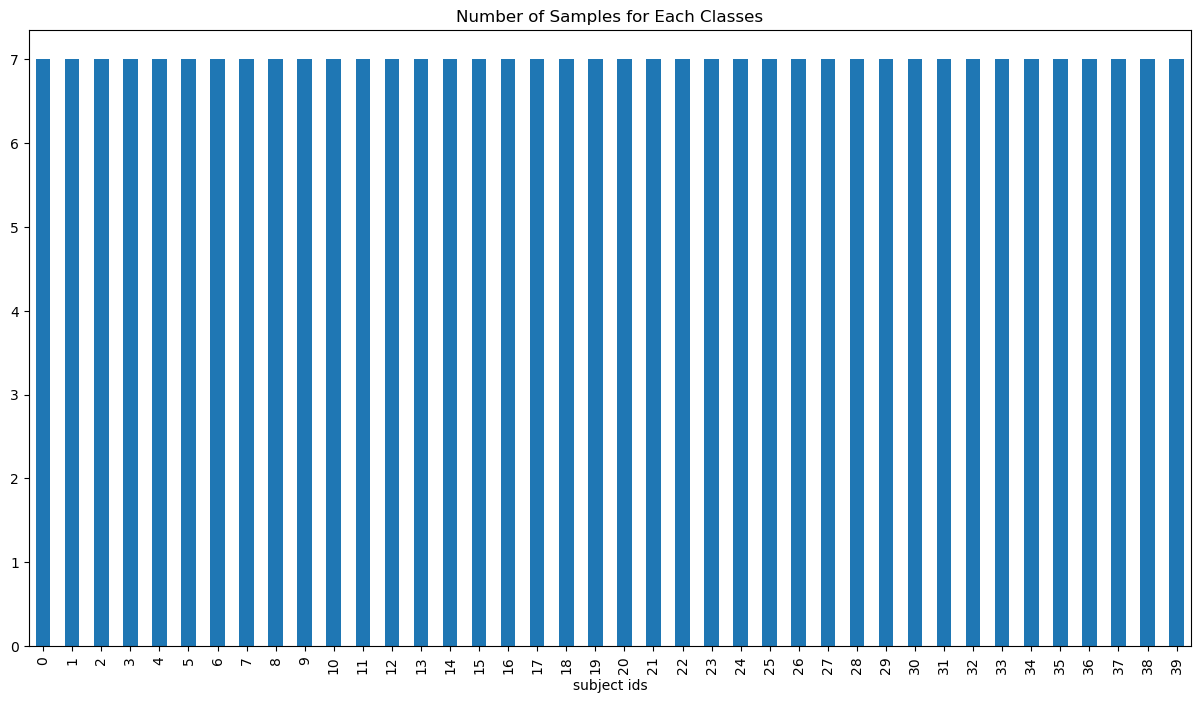

In [36]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

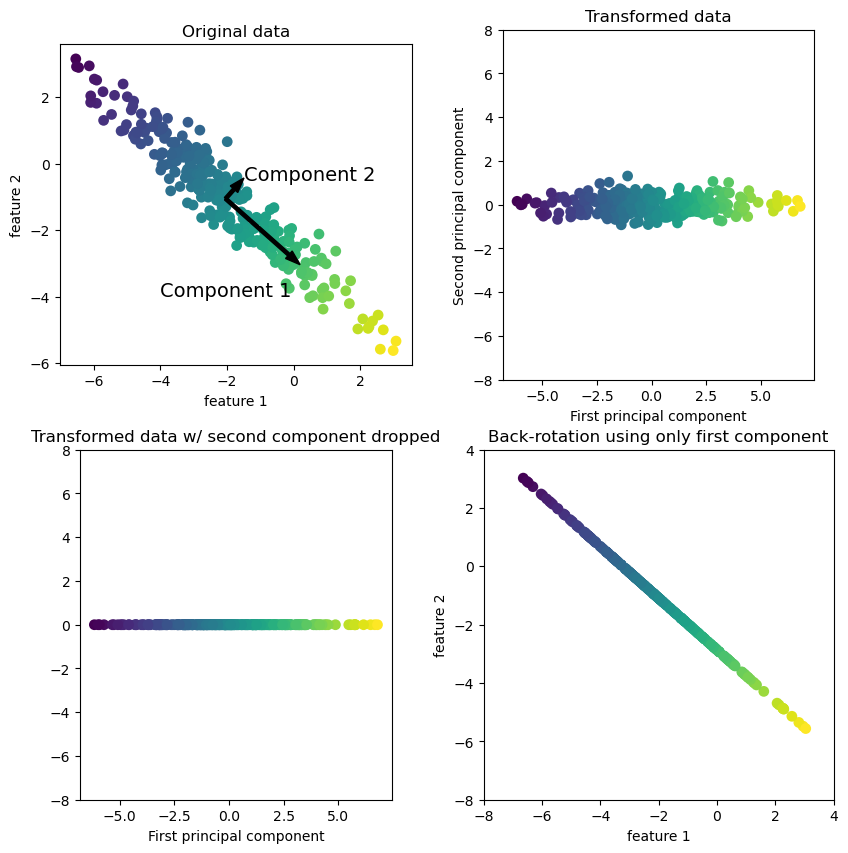

In [38]:
#Principle Component Analysis
mglearn.plots.plot_pca_illustration()

In [39]:
#PCA Projection of Defined Number of Target
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

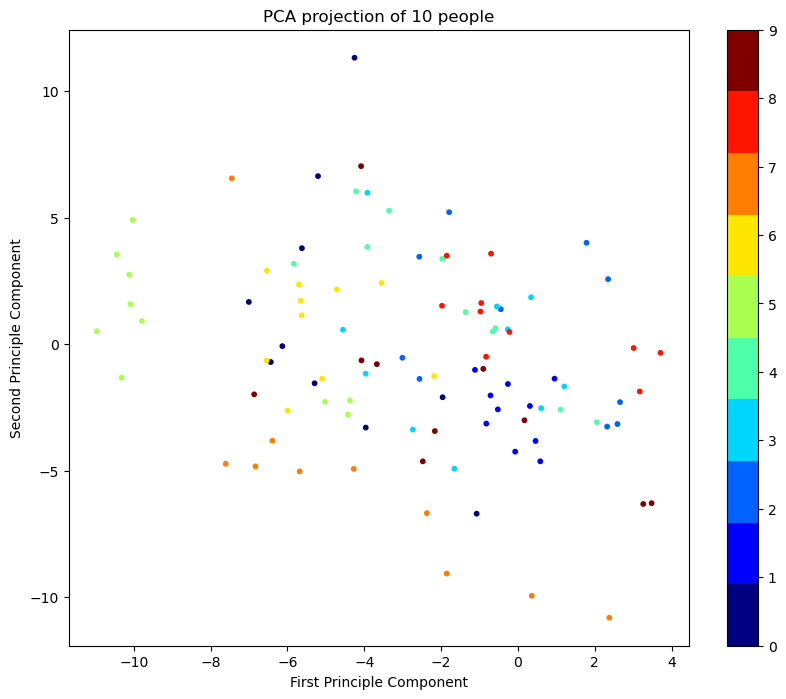

In [41]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=labels[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

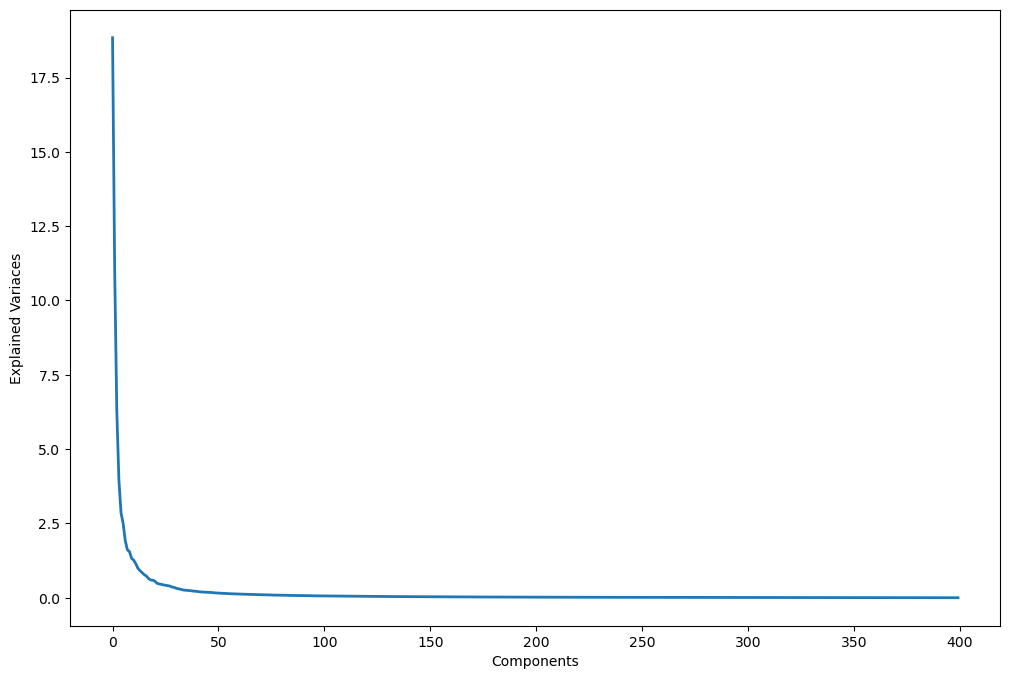

In [42]:
# Finding Optimum Number of Principle Component

pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [44]:
n_components=90

In [45]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

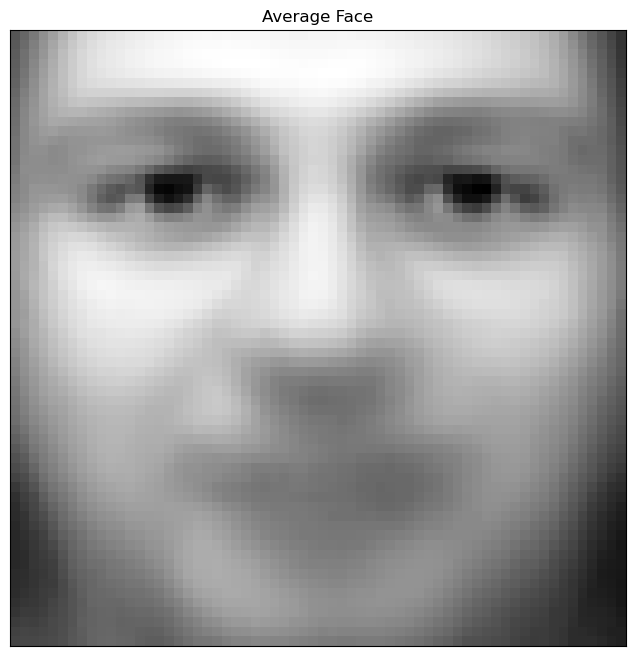

In [46]:
#Show Average Face
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

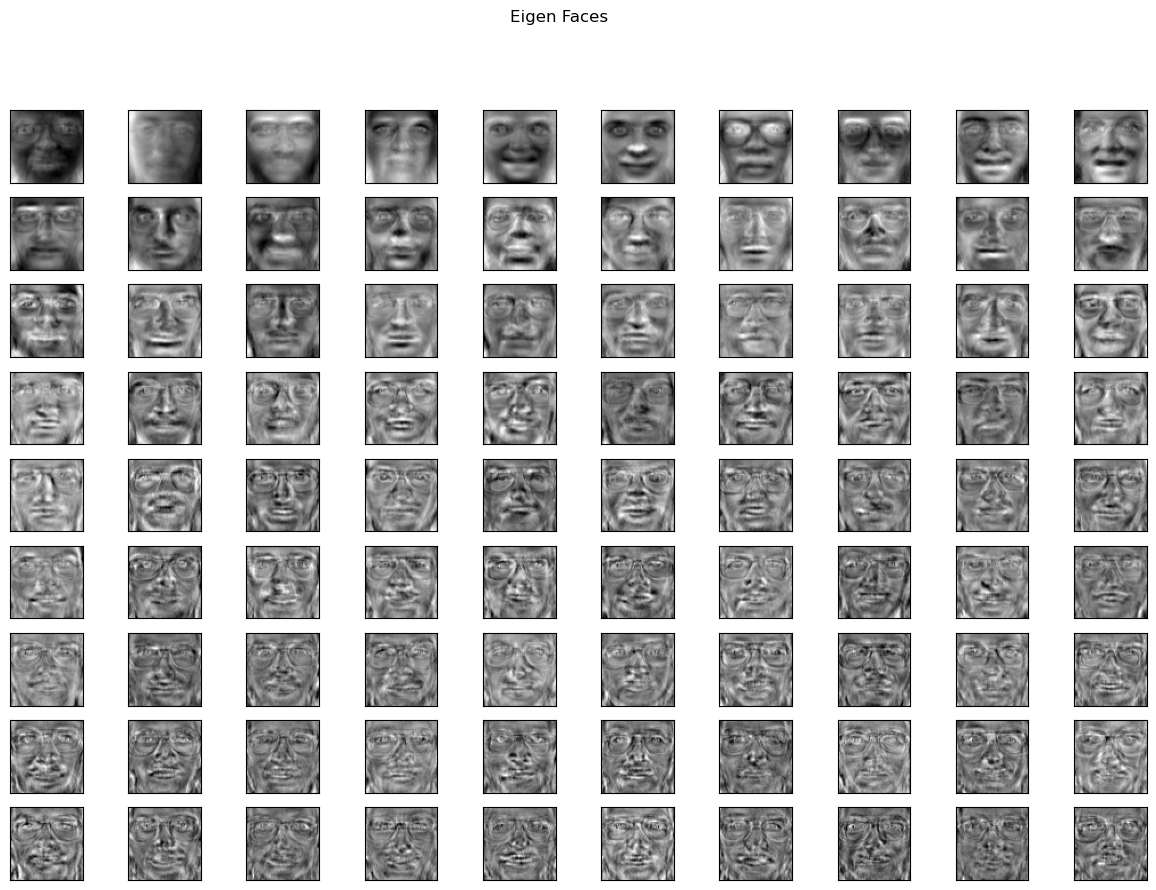

In [48]:
# Show Eigen Faces
number_of_eigenfaces = len(pca.components_)
original_image_shape = (64, 64)  # Assuming original image shape is 64x64

eigen_faces = pca.components_.reshape((number_of_eigenfaces, *original_image_shape))

# Plot Eigen Faces
cols = 10
rows = int(number_of_eigenfaces / cols)

fig, axarr = plt.subplots(rows, cols, figsize=(15, 10))
fig.suptitle("Eigen Faces")

for i in range(rows):
    for j in range(cols):
        axarr[i, j].imshow(eigen_faces[i * cols + j], cmap='gray')
        axarr[i, j].set_xticks([])
        axarr[i, j].set_yticks([])

plt.show()


In [49]:
#Classification Results

X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [54]:
# Assuming X_train_pca, X_test_pca, y_train, and y_test are already defined

# Initialize and train the Support Vector Classifier
clf = SVC()
clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: {:.2f}".format(accuracy))


Accuracy score: 0.92


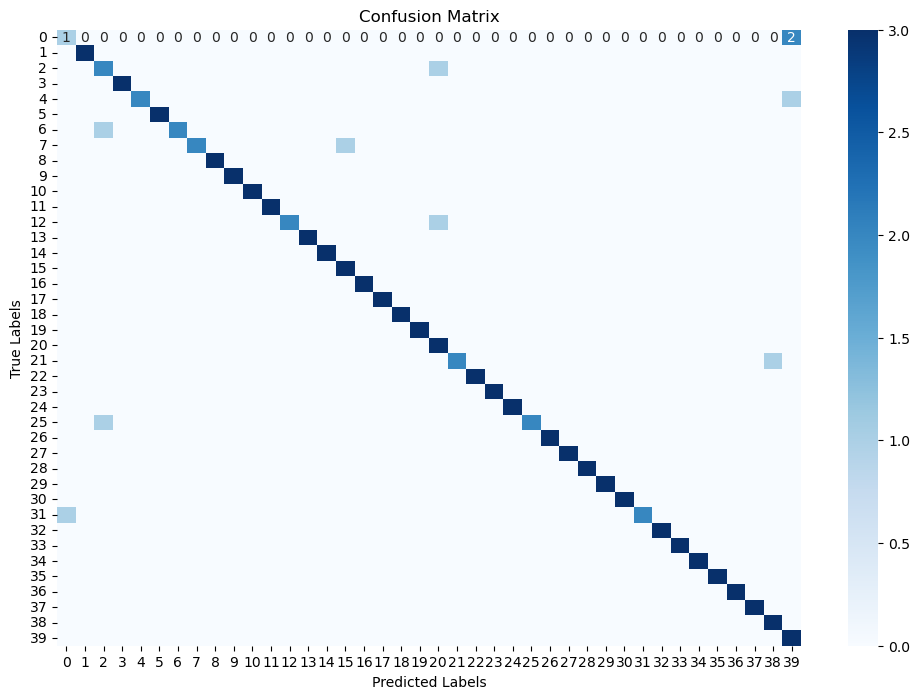

In [57]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [60]:
# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00    

In [62]:
# Define the CNN model
def create_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification (face or not face)
    ])
    return model


In [63]:
# Compile the model
model = create_model((64, 64, 1))  # Input shape for Olivetti Faces dataset
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [64]:
# Define early stopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.01,
    patience=3,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

In [66]:
X_train_reshaped = X_train.reshape((-1, 64, 64, 1))
X_val_reshaped = X_val.reshape((-1, 64, 64, 1))


In [67]:
# Train the model
history = model.fit(
    datagen.flow(X_train_reshaped, y_train, batch_size=32),
    epochs=30,
    steps_per_epoch=len(X_train_reshaped) / 32,
    validation_data=(X_val_reshaped, y_val),
    callbacks=[early_stopping]
)


Epoch 1/30
8/8 [==============================] - 4s 158ms/step - loss: -264.0977 - accuracy: 0.0250 - val_loss: -102.8215 - val_accuracy: 0.0125
Epoch 2/30
8/8 [==============================] - 1s 101ms/step - loss: -6932.4922 - accuracy: 0.0250 - val_loss: -2301.6807 - val_accuracy: 0.0125
Epoch 3/30
8/8 [==============================] - 1s 107ms/step - loss: -73331.7344 - accuracy: 0.0250 - val_loss: -21040.7500 - val_accuracy: 0.0125
Epoch 4/30
8/8 [==============================] - 1s 108ms/step - loss: -446631.2500 - accuracy: 0.0250 - val_loss: -124984.9844 - val_accuracy: 0.0125
Epoch 4: early stopping


In [68]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

3/3 [==============================] - 0s 22ms/step - loss: -102.8215 - accuracy: 0.0125
Validation Loss: -102.82154846191406
Validation Accuracy: 0.012500000186264515


In [78]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    clf = model
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    print(10 * "=", "{} Result".format(name).upper(), 10 * "=")
    print("Accuracy score: {:0.2f}".format(accuracy_score(y_test, y_pred)))
    print()


========== LDA RESULT ==========
Accuracy score: 0.93

========== LR RESULT ==========
Accuracy score: 0.93

========== NB RESULT ==========
Accuracy score: 0.87

========== KNN RESULT ==========
Accuracy score: 0.70

========== DT RESULT ==========
Accuracy score: 0.64

========== SVM RESULT ==========
Accuracy score: 0.92

